In [1]:
from numpy.random import uniform 
import matplotlib.pyplot as plt
import numpy as np

# unknown true values of the position 

x_0 = 10 # alpha
y_0  = 30 # beta

In [16]:
# generate draws from uniform distribution of thetas
thetas = uniform(-np.pi/2,np.pi/2,100)

In [17]:
# generate x-locations
xn_array = y_0 * np.tan(theta_array) + x_0

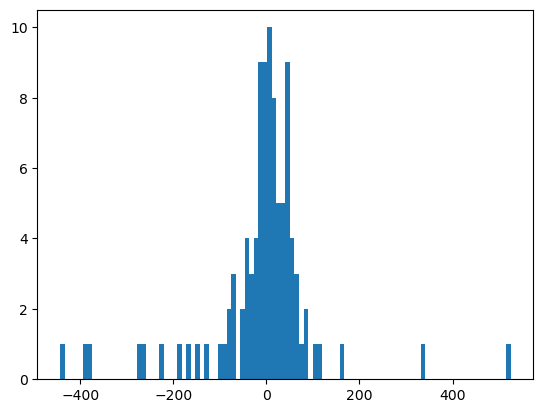

In [18]:
plt.hist(xn_array, bins=100)
plt.show()

In [19]:
# make grid search 
x_0_array = np.linspace(0, 50, 250)
y_0_array = np.linspace(0, 50, 250)



In [20]:
def ln_posterior_datum(x_0_assay,y_0_assay,datum):
    # contribution to the posterior from one datum (we ignore an additive constant)
    return np.log(y_0_assay / (y_0_assay**2 + (x_0_assay - datum)**2))

In [21]:
def grid_search(x_0_array, y_0_array, datum):
    # create meshgrid for x_0 and y_0 ranges
    X_0, Y_0 = np.meshgrid(x_0_array, y_0_array)

    # initialize array to store log posterior values
    posterior_grid = np.zeros_like(X_0)

    for i, X in enumerate(X_0):
        for j, Y in enumerate(Y_0):
            posterior_grid[i,j] = ln_posterior_datum(X[i],Y[j],datum)

    return posterior_grid

In [22]:
# loop over each data point 
posterior_full = np.zeros((len(x_0_array),len(y_0_array)))

In [30]:
posterior_full.shape

(250, 250)

In [23]:
for n_datum in range(len(xn_array)):
    print(n_datum)
    posterior_full += grid_search(x_0_array,y_0_array,xn_array[n_datum])

0
1
2
3
4


/var/folders/r9/vf1sqnrn01n0nzmbl59dbqjc0000gn/T/ipykernel_7905/809796487.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(y_0_assay / (y_0_assay**2 + (x_0_assay - datum)**2))


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


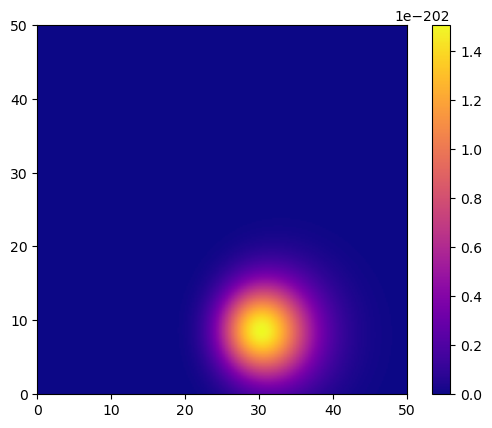

In [24]:
plt.imshow(np.exp(posterior_full), extent = (0, 50, 0, 50), origin = 'lower', cmap = 'plasma')
plt.colorbar()
plt.show()

In [12]:
np.nanmax(posterior_full)

np.float64(-1016.3214449240566)